In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
data=pd.read_csv('final_dataset (1).csv')
data.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [6]:
#Normalize the features using Standard scaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
#Display scaled Data
print(pd.DataFrame(data_scaled,columns=data.columns).head())

       Date     Month      Year  Holidays_Count      Days     PM2.5      PM10  \
0 -1.673805 -1.601451 -1.342192       -0.483687  0.499359  4.440081  1.734582   
1 -1.560170 -1.601451 -1.342192       -0.483687  0.999060  4.373624  2.659354   
2 -1.446535 -1.601451 -1.342192        2.067455  1.498761  1.874953  0.161085   
3 -1.332899 -1.601451 -1.342192       -0.483687 -1.499445 -0.017096 -0.666437   
4 -1.219264 -1.601451 -1.342192       -0.483687 -0.999744 -0.512586 -1.258606   

        NO2       SO2        CO     Ozone       AQI  
0  3.505073 -0.432635  2.868241  0.361638  2.410719  
1  0.444863 -0.902463  2.588680 -1.050893  2.596310  
2  3.798712 -0.554778  0.615310  0.419702  0.564095  
3  3.316792 -0.585616 -0.026035  0.678349  0.044441  
4  2.427354 -0.629152 -0.634490  0.661986 -0.493771  


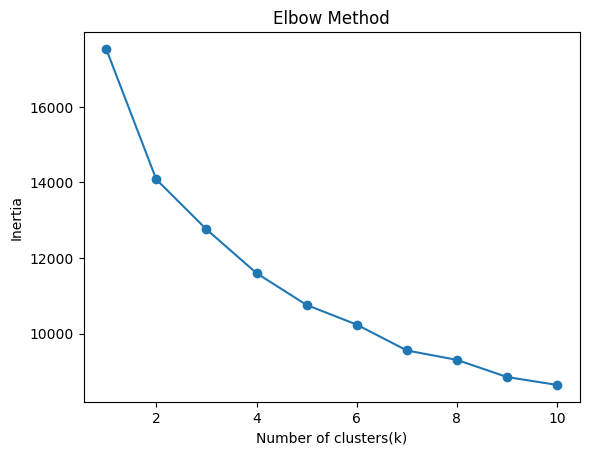

In [7]:
#use the Elbow method to find the optimal number of clusters
inertia=[]
k_range=range(1,11)

for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

#plot the inertia values to find the "elbow"
plt.plot(k_range,inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia')
plt.show()

In [8]:
k=2
kmeans=KMeans(n_clusters=k,random_state=42)
data['cluster']=kmeans.fit_predict(data_scaled)

#Display the first few rows with cluster labels
data.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,cluster
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,1
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,1
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,1
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,0
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,0


In [9]:
#calculate silhoutte score
sil_score=silhouette_score(data_scaled,data['cluster'])
print(f'Silhouette Score:{sil_score}')

Silhouette Score:0.21534732358949193


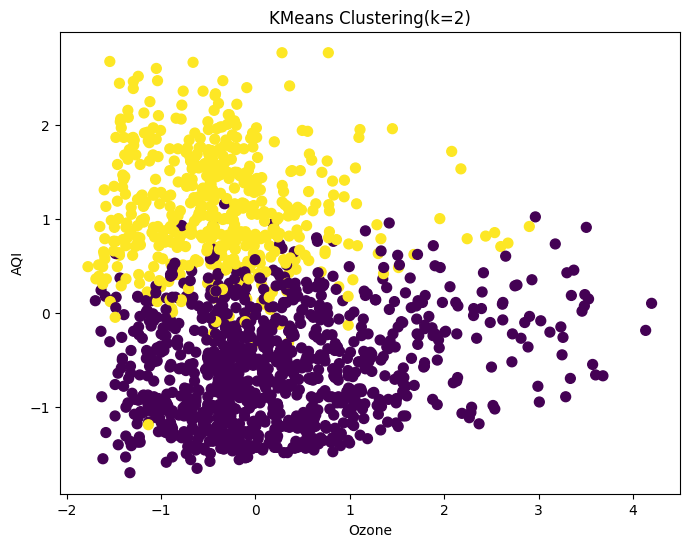

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(
    data_scaled[:,10],
    data_scaled[:,11],
    c=data['cluster'],
    cmap='viridis',
    s=50)
plt.title("KMeans Clustering(k=2)")
plt.xlabel("Ozone")
plt.ylabel("AQI")
plt.show()

In [12]:
import pandas as pd
import numpy as np

In [13]:
data=pd.read_csv('final_dataset (1).csv')
data.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [14]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
print(pd.DataFrame(data_scaled,columns=data.columns).head())

       Date     Month      Year  Holidays_Count      Days     PM2.5      PM10  \
0 -1.673805 -1.601451 -1.342192       -0.483687  0.499359  4.440081  1.734582   
1 -1.560170 -1.601451 -1.342192       -0.483687  0.999060  4.373624  2.659354   
2 -1.446535 -1.601451 -1.342192        2.067455  1.498761  1.874953  0.161085   
3 -1.332899 -1.601451 -1.342192       -0.483687 -1.499445 -0.017096 -0.666437   
4 -1.219264 -1.601451 -1.342192       -0.483687 -0.999744 -0.512586 -1.258606   

        NO2       SO2        CO     Ozone       AQI  
0  3.505073 -0.432635  2.868241  0.361638  2.410719  
1  0.444863 -0.902463  2.588680 -1.050893  2.596310  
2  3.798712 -0.554778  0.615310  0.419702  0.564095  
3  3.316792 -0.585616 -0.026035  0.678349  0.044441  
4  2.427354 -0.629152 -0.634490  0.661986 -0.493771  


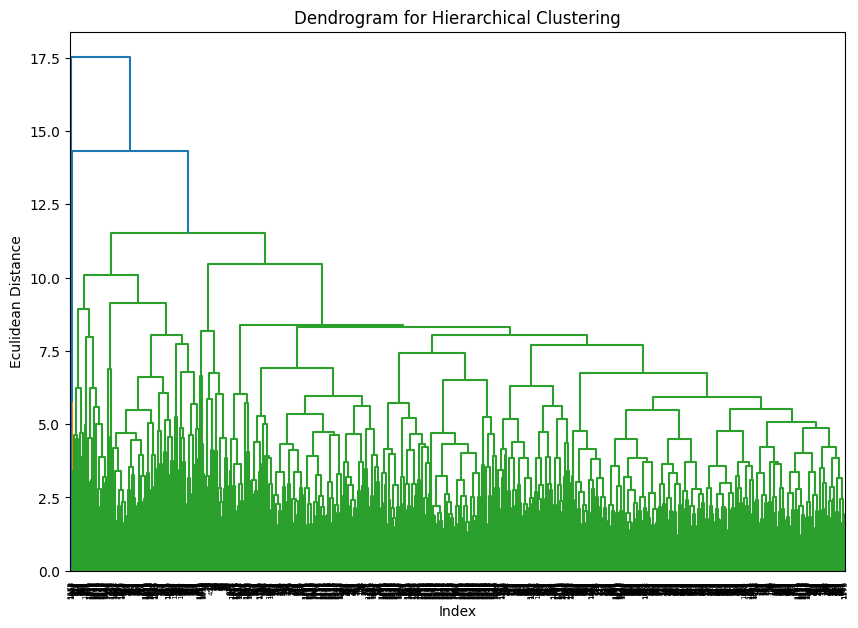

In [16]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(10,7))
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='complete'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Eculidean Distance')
plt.show()